In [2]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
import matplotlib.pyplot as plt

In [3]:
data_dir = r"C:\Users\kishore l\sign-language-detector\data\asl_alphabet_train\asl_alphabet_train"

# Parameters
img_size = 200
batch_size = 32
num_classes = 29
epochs = 25
initial_lr = 0.001

In [4]:
data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [6]:
# Model architecture
model = Sequential([
    Input(shape=(img_size, img_size, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=initial_lr),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
# Checkpoint callback
checkpoint_path = r"C:\Users\kishore l\sign-language-detector\model\best_model.keras"
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_best_only=True,
    monitor='val_loss',
    mode='min',
    verbose=1,
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Stop training if no improvement for 5 epochs
    restore_best_weights=True
)

# Learning rate scheduler
def scheduler(epoch, lr):
    if epoch > 10:  # Reduce learning rate after 10 epochs
        return lr * 0.5
    return lr

lr_scheduler_callback = LearningRateScheduler(scheduler)

# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[checkpoint_callback, early_stopping_callback, lr_scheduler_callback]
)

print(f"Best model saved to: {checkpoint_path}")


C:\Users\kishore l\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - accuracy: 0.2050 - loss: 2.7202
Epoch 1: val_loss improved from inf to 1.24466, saving model to C:\Users\kishore l\sign-language-detector\model\best_model.h5


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2319s 1s/step - accuracy: 0.2050 - loss: 2.7199 - val_accuracy: 0.5836 - val_loss: 1.2447
Epoch 2/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - accuracy: 0.6502 - loss: 1.0557
Epoch 2: val_loss improved from 1.24466 to 0.91924, saving model to C:\Users\kishore l\sign-language-detector\model\best_model.h5


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2328s 1s/step - accuracy: 0.6502 - loss: 1.0557 - val_accuracy: 0.6852 - val_loss: 0.9192
Epoch 3/5
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7694 - loss: 0.6791
Epoch 3: val_loss improved from 0.91924 to 0.74973, saving model to C:\Users\kishore l\sign-language-detector\model\best_model.h5


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 2482s 1s/step - accuracy: 0.7694 - loss: 0.6791 - val_accuracy: 0.7330 - val_loss: 0.7497
Epoch 4/5
 107/2175 ━━━━━━━━━━━━━━━━━━━━ 34:59 1s/step - accuracy: 0.8235 - loss: 0.5557

KeyboardInterrupt: 

NameError: name 'history' is not defined

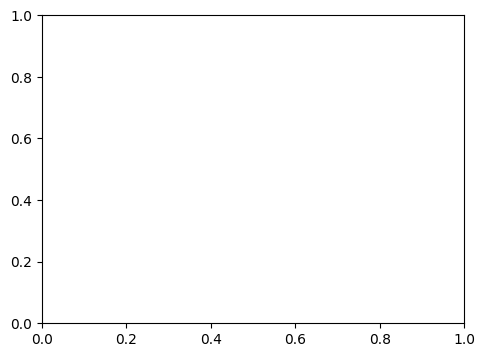

In [8]:

# Plot training results
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()